# Análisis exploratorio de datos

In [1]:
import pandas as pd #tratamiento de datos
import numpy as np #operaciones matriciales y con vectores
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
pat='C:/Users/jctor/OneDrive/Escritorio/ciencia de datos\semana_4'
data=pd.read_csv(pat+'/DatosCorazon.csv',sep=';',header=None)

In [11]:
data.shape

(720, 15)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [13]:
colnames = ["ciudad", "edad", "sexo", "tipo_dolor", "presion", "colesterol", "azucar", "ecg", "pulso", "angina", 
         "st", "pendiente", "venas", "thal", "target"]
data.columns=colnames
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


<AxesSubplot:xlabel='target', ylabel='count'>

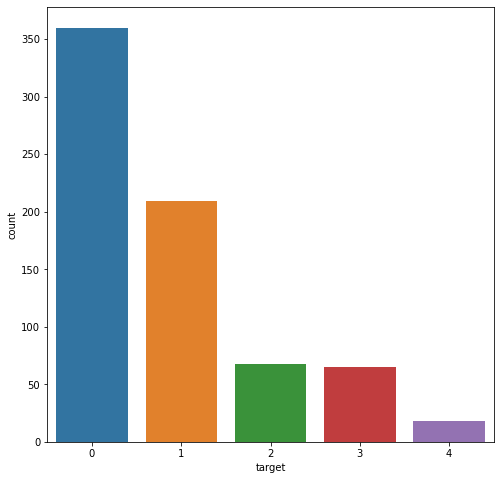

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=data)

 con este codigo hacemos un conteo de la variable salida

In [16]:
pd.crosstab(index=data["target"], columns="count")

col_0,count
target,
0,360
1,209
2,68
3,65
4,18


Vemos cantidad de observaciones por categoría de la variable objetivo haciendo uso de un cross tabulation.

In [17]:
data.loc[(data.target > 0), "target"] = 1

Vamos a arreglar la variable objetivo. Para ello primero establecemos los 2 valores posibles. Modificamos reemplazando los 4 valores que se considerarán como positivos. Vamos a convertir todas aquellas observaciones con variable objetivo positiva como 1 (de todas las filas que tienen asignadas un valor mayor de cero para la variable objetivo, le asignamos al target el valor de 1).

# Baseline global

<AxesSubplot:xlabel='target', ylabel='count'>

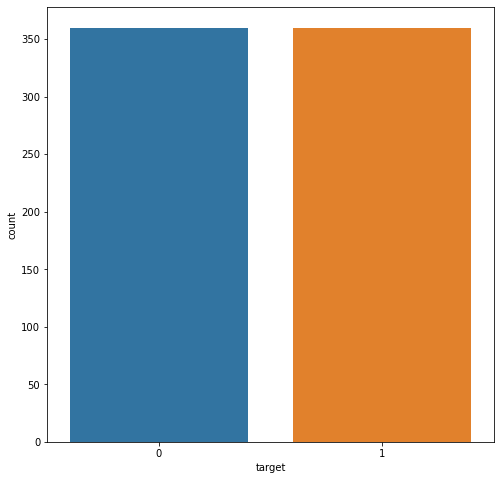

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=data)

Revisamos con el cambio la variable salida y nos damos cuenta que son muy similares

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    int64  
 3   tipo_dolor  720 non-null    int64  
 4   presion     720 non-null    object 
 5   colesterol  720 non-null    object 
 6   azucar      720 non-null    object 
 7   ecg         720 non-null    object 
 8   pulso       720 non-null    object 
 9   angina      720 non-null    object 
 10  st          720 non-null    object 
 11  pendiente   720 non-null    object 
 12  venas       720 non-null    object 
 13  thal        720 non-null    object 
 14  target      720 non-null    int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


Estos son los tipos de variable que tenemos en el data frame la gran mayoria son de tipo objeto

In [21]:
data.target = data.target.astype(str)

convertimos a str la variable objetivo

In [22]:
pd.crosstab(index=data["target"], columns="count")

col_0,count
target,
0,360
1,360


realizamos na tabla cruzada para revisar cuantos unos y cero tenemos y nos damos cuenta que se encuentra balanceada

In [23]:
data.shape

(720, 15)

tenemos 720 registros y 15 variables

In [24]:
data['target'][data['target'] == '0'].count()/data.shape[0]*100

50.0

Calculamos el baseline (la clase mayoritaria). Como hay la misma cantidad de positivos que negativos simplemente escogemos cualquiera de las dos categorías, contamos cuántos registros de ellas hay, dividimos por el total de filas y multiplicamos por 100 para que nos quede el porcentaje de la clase mayoritaria.

<AxesSubplot:xlabel='ciudad', ylabel='count'>

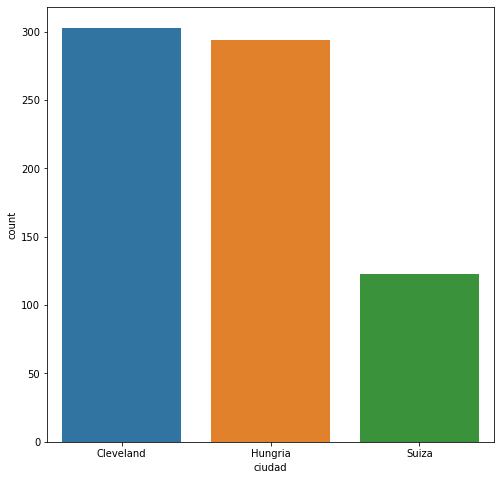

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x='ciudad',data=data)


In [27]:
pd.crosstab(index=data['ciudad'],columns='count')

col_0,count
ciudad,
Cleveland,303
Hungria,294
Suiza,123


Vemos que la mayoría de los datos son de Cleveland

Vamos a dividir el dataset en tres nuevos dataframe (cada uno de estos tres podría tener características distintas, que tal vez haga que nuestro modelo futuro no pueda obtener tan buenos resultados si es tan general)

In [28]:
dataCleveland=data[data.ciudad=="Cleveland"]
dataHungria=data[data.ciudad=="Hungria"]
dataSuiza=data[data.ciudad=="Suiza"]


# Baseline Cleveland

<AxesSubplot:xlabel='target', ylabel='count'>

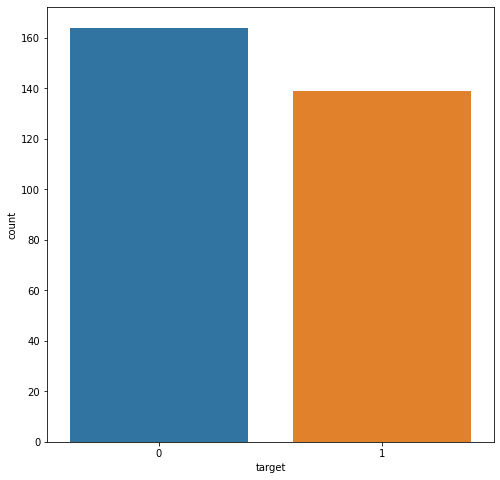

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataCleveland)

In [30]:
dataCleveland['target'][dataCleveland['target'] == '0'].count()/dataCleveland.shape[0]*100


54.12541254125413

Podemos observar que el 54% de las personas que viven en Cleveland no tienen problemas del corazón



# Baseline Suiza

<AxesSubplot:xlabel='target', ylabel='count'>

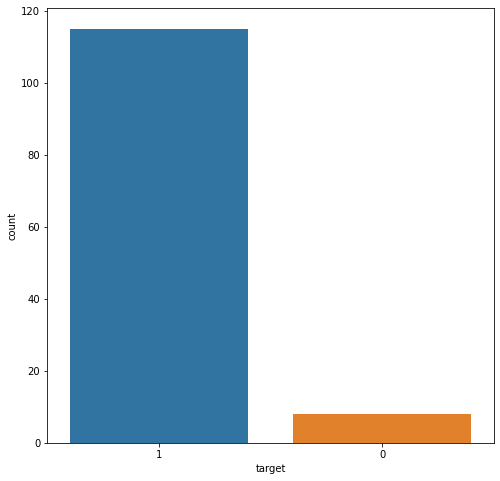

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataSuiza)

In [32]:
dataSuiza[dataSuiza['target'] == '1']['target'].count()/dataSuiza.shape[0]*100

93.4959349593496

El baseline de Suiza es que la gente tiene problemas cardíacos en un 93.5%

# Baseline Hungría

<AxesSubplot:xlabel='target', ylabel='count'>

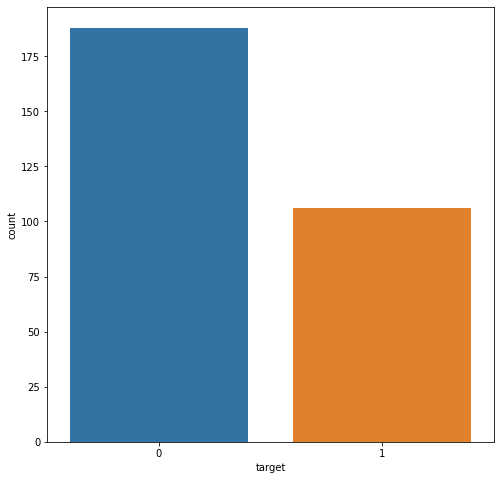

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(x='target',data=dataHungria)


In [34]:
dataHungria[dataHungria['target'] == '0']['target'].count()/dataHungria.shape[0]*100


63.94557823129252

El Baseline para Hungría es que la gente no tienen problemas cardíacos en un 63.95%

Los datasets son bastante diferentes y de pronto no sería bueno utilizarlos conjuntamente. No resulta proudente para diagnosticar un paciente de Cleveland utilizar un modelo aprendido con los tres conjuntos de datos, pues sus niveles de desbalanceo son muy diferentes. La clase positiva tiene una proporción de 46% para Cleveland, 93% para Suiza y de 36% para Hungría.



# 2. Analizando problemas de calidad de datos

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    int64  
 3   tipo_dolor  720 non-null    int64  
 4   presion     720 non-null    object 
 5   colesterol  720 non-null    object 
 6   azucar      720 non-null    object 
 7   ecg         720 non-null    object 
 8   pulso       720 non-null    object 
 9   angina      720 non-null    object 
 10  st          720 non-null    object 
 11  pendiente   720 non-null    object 
 12  venas       720 non-null    object 
 13  thal        720 non-null    object 
 14  target      720 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 84.5+ KB


Aquí podemos ver que:

hay tipos de datos que no corresponden a los del diccionario ("sexo" y "tipo_dolor" deberían ser categóricas, "presion", "colesterol", "pulso" y "st" deberían ser numéricas)
aparentemente no hay valores faltantes
Vemos una descripción estadística de las variables

In [36]:
data.describe(include='all')

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.000000,720,720,720,720,720,720,720,720,720,720,720
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,2
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,1
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,360
mean,NaN,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aquí podemos ver que:

confirmamos los tipos de variables que no corresponden para bastantes de las columnas.
encontramos en las variables venas y thal datos categóricos donde el valor más común es "?", este problema podría aparecer en otras variables categóricas donde "?" no es el valor más preponderante.
el número de valores posibles no corresponde para las variables:
azucar (3 en vez de 2)
ecg (4 en vez de 3)
angina (3 en vez de 2)
pendiente (6 en vez de 3)
venas (6 en vez de 4)
thal (6 en vez de 3)

In [38]:
data.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

# Limpieza: valores inválidos y tipos de columnas

Varias de los atributos del dataset fueron leidos con el tipo de datos que no correspondía:

"sexo" es una variable categórica codificada con valores "0" y "1"
"tipo_dolor" es una variable categórica codificada con valores "1", "2", "3", y "4"
"presion" es una variable numérica que aparece como categórica
"colesterol" es una variable numérica que aparece como categórica
"pulso": es una variable numérica que aparece como categórica
"st": es una variable numérica que aparece como categórica
Primero convertimos las variables numéricas incorrectas a categóricas



In [39]:
cols = ['sexo','tipo_dolor']
for col in cols:
    data[col] = data[col].astype(str)

Verificamos qué variables categóricas tienen valores de ?

In [41]:
for var in data.select_dtypes(include=['object']).columns:
    cantidad = data[data[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en ciudad con el valor ?
Existen 0 valores en sexo con el valor ?
Existen 0 valores en tipo_dolor con el valor ?
Existen 3 valores en presion con el valor ?
Existen 23 valores en colesterol con el valor ?
Existen 83 valores en azucar con el valor ?
Existen 2 valores en ecg con el valor ?
Existen 2 valores en pulso con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en st con el valor ?
Existen 207 valores en pendiente con el valor ?
Existen 413 valores en venas con el valor ?
Existen 320 valores en thal con el valor ?
Existen 0 valores en target con el valor ?


No podemos convertir en numéricos algunos de los campos presion, colesterol, pulso y st, ya que se encuentra el caracter "?", que no se puede convertir a número. Suponemos que este caracter indica un valor faltante, por lo que convertimos todos los valores correspondientes a nan.

In [42]:
data = data.replace('?',np.nan)

Habiendo realizado estos cambios ya podemos convertir las variables categóricas incorrectas en numéricas

In [44]:
columns = ['presion','colesterol','pulso','st']
for col in columns:
    data[col] = data[col].astype('float64')

Revisamos los nuevos tipos de datos para todas las variables del dataset



In [45]:
data.describe(include='all')

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720,720,717.000000,697.000000,637,718,718.000000,718,714.000000,513,307,400,720
unique,3,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,5,5,5,2
top,Cleveland,NaN,1,4,NaN,NaN,0,0,NaN,0,NaN,2,0,3,1
freq,303,NaN,532,365,NaN,NaN,567,471,NaN,476,NaN,290,177,190,360
mean,NaN,51.888889,NaN,NaN,131.804742,204.774749,NaN,NaN,140.565460,NaN,0.789636,NaN,NaN,NaN,NaN
std,NaN,9.193720,NaN,NaN,18.529331,109.275156,NaN,NaN,25.647172,NaN,1.066961,NaN,NaN,NaN,NaN
min,NaN,28.000000,NaN,NaN,80.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,NaN,NaN
25%,NaN,45.000000,NaN,NaN,120.000000,182.000000,NaN,NaN,122.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,130.000000,227.000000,NaN,NaN,142.000000,NaN,0.200000,NaN,NaN,NaN,NaN
75%,NaN,58.000000,NaN,NaN,140.000000,270.000000,NaN,NaN,160.000000,NaN,1.500000,NaN,NaN,NaN,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    object 
 3   tipo_dolor  720 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  697 non-null    float64
 6   azucar      637 non-null    object 
 7   ecg         718 non-null    object 
 8   pulso       718 non-null    float64
 9   angina      718 non-null    object 
 10  st          714 non-null    float64
 11  pendiente   513 non-null    object 
 12  venas       307 non-null    object 
 13  thal        400 non-null    object 
 14  target      720 non-null    object 
dtypes: float64(5), object(10)
memory usage: 84.5+ KB


In [47]:
data.isna().sum()

ciudad          0
edad            0
sexo            0
tipo_dolor      0
presion         3
colesterol     23
azucar         83
ecg             2
pulso           2
angina          2
st              6
pendiente     207
venas         413
thal          320
target          0
dtype: int64

Verificamos la cantidad de valores faltantes por cada una de las variables

Como las variables venas, pendientes y thal presentan tantos datos faltantes procederemos a eliminarlas

In [48]:
data.drop(columns=['venas','pendiente','thal'],inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    object 
 3   tipo_dolor  720 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  697 non-null    float64
 6   azucar      637 non-null    object 
 7   ecg         718 non-null    object 
 8   pulso       718 non-null    float64
 9   angina      718 non-null    object 
 10  st          714 non-null    float64
 11  target      720 non-null    object 
dtypes: float64(5), object(7)
memory usage: 67.6+ KB


Vamos a modificar azucar, creando una nueva categoría para los valores faltantes

In [51]:
pd.crosstab(index=data['azucar'],columns='count')

col_0,count
azucar,
0,567
1,70


In [52]:
data.loc[data['azucar'].isna(),'azucar'] = -1

In [53]:
pd.crosstab(index=data['azucar'],columns='count')

col_0,count
azucar,
-1,83
0,567
1,70


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    object 
 3   tipo_dolor  720 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  697 non-null    float64
 6   azucar      720 non-null    object 
 7   ecg         718 non-null    object 
 8   pulso       718 non-null    float64
 9   angina      718 non-null    object 
 10  st          714 non-null    float64
 11  target      720 non-null    object 
dtypes: float64(5), object(7)
memory usage: 67.6+ KB


Vamos a reemplazar los valores faltantes de colesterol por el promedio

In [55]:
data.loc[data['colesterol'].isna(),'colesterol'] = data['colesterol'].mean()


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    object 
 3   tipo_dolor  720 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  720 non-null    float64
 6   azucar      720 non-null    object 
 7   ecg         718 non-null    object 
 8   pulso       718 non-null    float64
 9   angina      718 non-null    object 
 10  st          714 non-null    float64
 11  target      720 non-null    object 
dtypes: float64(5), object(7)
memory usage: 67.6+ KB


# Limpieza y busqueda de excepciones

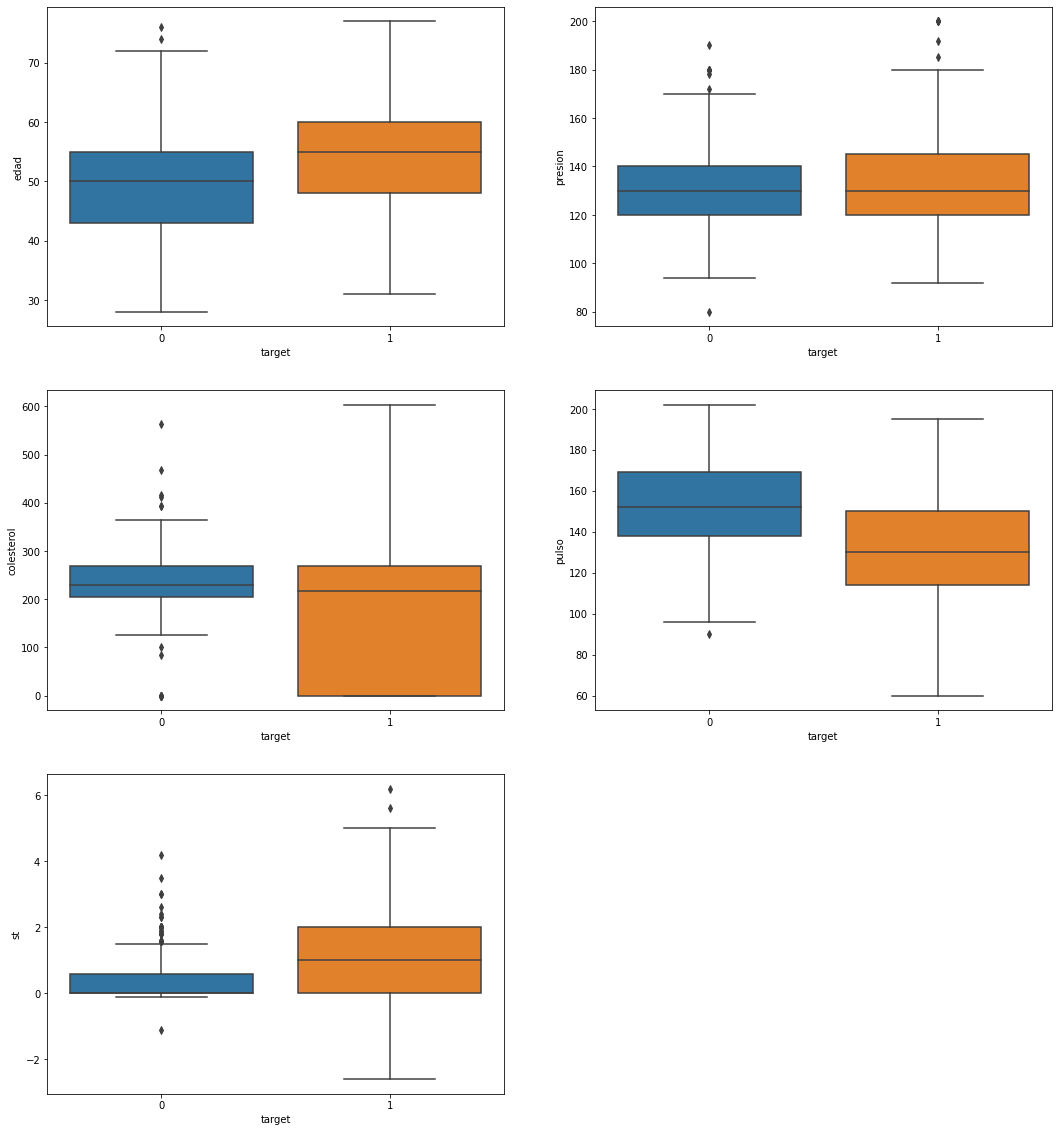

In [57]:
cols = ['edad','presion','colesterol','pulso','st']
i=1
plt.figure(figsize=(18,20))
for col in cols:
    plt.subplot(3,2,i)
    sns.boxplot(x='target',y=col,data=data)
    i += 1

Vamos a verificar los valores para las variables colesterol y st que pareciese que tienen valores alejados de la media.

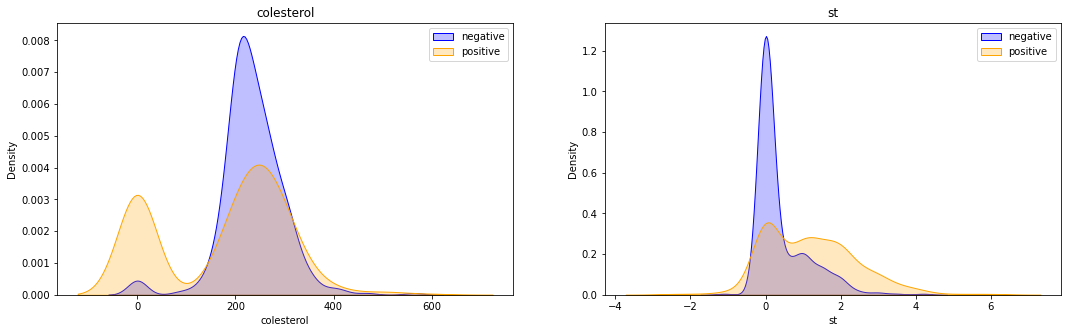

In [59]:
cols = ['colesterol','st']
i=1
plt.figure(figsize=(18,5))
for col in cols:
    plt.subplot(1,2,i)
    sns.kdeplot(data[data['target']=='0'][col],shade=True,color='blue')
    sns.kdeplot(data[data['target']=='1'][col],shade=True,color='orange')
    plt.legend(['negative','positive'])
    plt.title(col)
    i += 1

No consideramos que hay valores que se salen demasiado de lo normal:

En el st tenemos colas largas sin ser anómalas
En el colesterol tenemos datos marcadamente bimodales, por lo que no se tratan de anomalías.
Si queremos entrar en detalle podemos darnos cuenta que tan sólo dos registros estás a +/- 4 desviaciones estándar.

upper_bounds={}

In [60]:
upper_bounds={}
lower_bounds={}
cols = ['edad','presion','colesterol','pulso','st']
for col in cols:
    values=data[col]
    upper_bounds[col]=values.mean()+4*values.std()
    lower_bounds[col]=values.mean()-4*values.std()

In [61]:
for col in cols:
    values=data[col]
    if(data[values>upper_bounds[col]][col].count() > 0):
        print(data[values>upper_bounds[col]][col])
    if(data[values<lower_bounds[col]][col].count() > 0):
        print(data[values<lower_bounds[col]][col])

91     6.2
123    5.6
Name: st, dtype: float64
